In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Concatenating multiple TSV file to make a single TSV file .


In [ ]:
import pandas as pd
import glob

tsv_folder_path = '/content/drive/MyDrive/dataset/dataset/train/boxes_transcripts_labels/'

# Get all the TSV files from the specified folder
tsv_files = glob.glob(tsv_folder_path + '*.tsv')

# Define the expected column names for both training and test data
expected_columns_train = [
    'start_index', 'end_index', 'x_top_left', 'y_top_left',
    'x_bottom_right', 'y_bottom_right', 'transcript', 'field', 'image_name'
]

expected_columns_test = [
    'start_index', 'end_index', 'x_top_left', 'y_top_left',
    'x_bottom_right', 'y_bottom_right', 'transcript', 'image_name'
]

def load_tsv_with_image(file_path):
    data = pd.read_csv(file_path, sep='\t', header=None)


    print(f"Processing file: {file_path}")
    print(f"Number of columns in {file_path}: {data.shape[1]}")

    split_data = data[0].str.split(',', expand=True)

    num_columns = len(split_data.columns)
    if num_columns == 8:
        split_data.columns = expected_columns_train[:-1]  # Exclude image_name
    elif num_columns == 7:
        split_data.columns = expected_columns_test[:-1]  # Exclude image_name
    else:
        print(f"Unexpected number of columns: {num_columns} in file: {file_path}")
        return pd.DataFrame()
    image_name = file_path.split('/')[-1].replace('.tsv', '')


    split_data['image_name'] = image_name

    return split_data

try:
    all_data = pd.concat([load_tsv_with_image(file) for file in tsv_files], ignore_index=True)
except ValueError as e:
    print(e)

if 'all_data' in locals():
    print(all_data.head())
else:
    print("Data loading failed. Check the diagnostic messages above.")


Processing file: /content/drive/MyDrive/dataset/dataset/train/boxes_transcripts_labels/0e997ed9-76ba-4124-ac89-38e870352902_document-6_page-1.tsv
Number of columns in /content/drive/MyDrive/dataset/dataset/train/boxes_transcripts_labels/0e997ed9-76ba-4124-ac89-38e870352902_document-6_page-1.tsv: 1
Unexpected number of columns: 9 in file: /content/drive/MyDrive/dataset/dataset/train/boxes_transcripts_labels/0e997ed9-76ba-4124-ac89-38e870352902_document-6_page-1.tsv
Processing file: /content/drive/MyDrive/dataset/dataset/train/boxes_transcripts_labels/2259f961-339a-493f-9025-7c454cc8b8d7_document-8_page-1.tsv
Number of columns in /content/drive/MyDrive/dataset/dataset/train/boxes_transcripts_labels/2259f961-339a-493f-9025-7c454cc8b8d7_document-8_page-1.tsv: 1
Unexpected number of columns: 9 in file: /content/drive/MyDrive/dataset/dataset/train/boxes_transcripts_labels/2259f961-339a-493f-9025-7c454cc8b8d7_document-8_page-1.tsv
Processing file: /content/drive/MyDrive/dataset/dataset/train/

In [ ]:
import pandas as pd
import glob

tsv_folder_path = '/content/drive/MyDrive/dataset/dataset/val/boxes_transcripts/'

tsv_files = glob.glob(tsv_folder_path + '*.tsv')

expected_columns_train = [
    'start_index', 'end_index', 'x_top_left', 'y_top_left',
    'x_bottom_right', 'y_bottom_right', 'transcript', 'image_name'
]

expected_columns_test = [
    'start_index', 'end_index', 'x_top_left', 'y_top_left',
    'x_bottom_right', 'y_bottom_right', 'transcript', 'image_name'
]

def load_tsv_with_image(file_path):
    data = pd.read_csv(file_path, sep='\t', header=None)

    print(f"Processing file: {file_path}")
    print(f"Number of columns in {file_path}: {data.shape[1]}")

    split_data = data[0].str.split(',', expand=True)

    num_columns = len(split_data.columns)
    if num_columns == 8:
        split_data.columns = expected_columns_train[:-1]
    elif num_columns == 7:
        split_data.columns = expected_columns_test[:-1]
    else:
        print(f"Unexpected number of columns: {num_columns} in file: {file_path}")
        return pd.DataFrame()

    image_name = file_path.split('/')[-1].replace('.tsv', '')

    split_data['image_name'] = image_name

    return split_data

try:
    all_data = pd.concat([load_tsv_with_image(file) for file in tsv_files], ignore_index=True)
except ValueError as e:
    print(e)

if 'all_data' in locals():
    print(all_data.head())
else:
    print("Data loading failed. Check the diagnostic messages above.")

Processing file: /content/drive/MyDrive/dataset/dataset/val/boxes_transcripts/ef630989-4d33-4d26-bf80-9ffece13fc5d_document-3_page-1.tsv
Number of columns in /content/drive/MyDrive/dataset/dataset/val/boxes_transcripts/ef630989-4d33-4d26-bf80-9ffece13fc5d_document-3_page-1.tsv: 1
Length mismatch: Expected axis has 8 elements, new values have 7 elements
Data loading failed. Check the diagnostic messages above.


In [ ]:
if 'all_data' in locals():
    output_file_path = '/content/drive/MyDrive/dataset/dataset/val/combined_data.tsv'

    all_data.to_csv(output_file_path, sep='\t', index=False)
    print(f"Combined data saved to {output_file_path}")
else:
    print("No data to save. Check the diagnostic messages above.")


Combined data saved to /content/drive/MyDrive/dataset/dataset/val/combined_data.tsv


## EDA and Data Preprocessing

In [ ]:
import pandas as pd

# Load the combined data
file_path = '/content/drive/MyDrive/dataset/dataset/train/combined_data.tsv'
data = pd.read_csv(file_path, sep='\t')


In [ ]:
print(data.info())

print(data.head())

print(data.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3619 entries, 0 to 3618
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   start_index     3619 non-null   int64 
 1   end_index       3619 non-null   int64 
 2   x_top_left      3619 non-null   int64 
 3   y_top_left      3619 non-null   int64 
 4   x_bottom_right  3619 non-null   int64 
 5   y_bottom_right  3619 non-null   int64 
 6   transcript      3619 non-null   object
 7   field           3619 non-null   object
 8   image_name      3619 non-null   object
dtypes: int64(6), object(3)
memory usage: 254.6+ KB
None
   start_index  end_index  x_top_left  y_top_left  x_bottom_right  \
0           33         36         980          95            1091   
1           38         40         210         137             268   
2           42         44        1200         112            1290   
3           46         53        1296         120            1552   
4       

In [ ]:
print(data.isnull().sum())

print(f"Number of duplicate rows: {data.duplicated().sum()}")


start_index       0
end_index         0
x_top_left        0
y_top_left        0
x_bottom_right    0
y_bottom_right    0
transcript        0
field             0
image_name        0
dtype: int64
Number of duplicate rows: 0


<ipython-input-3-80c4e6b68335>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=token_counts.index, y=token_counts.values, palette='viridis')


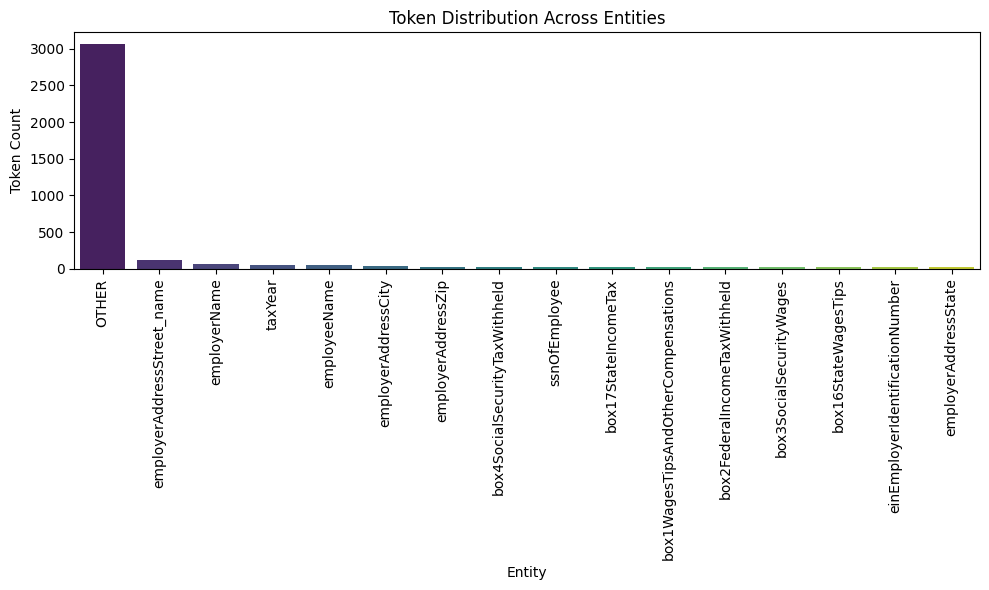

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the TSV file for training data
train_df = pd.read_csv('/content/drive/MyDrive/dataset/dataset/train/combined_data.tsv', sep='\t')

# Check the distribution of tokens per entity
token_counts = train_df['field'].value_counts()

# Visualize the token distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=token_counts.index, y=token_counts.values, palette='viridis')
plt.title('Token Distribution Across Entities')
plt.xlabel('Entity')
plt.ylabel('Token Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [4]:
# Checking for potential OCR issues by identifying common OCR mistakes
ocr_mistakes = train_df['transcript'].str.contains(r'[0O5S]', regex=True)

# Get the tokens that might have OCR errors
ocr_errors_df = train_df[ocr_mistakes]

# Show a sample of the rows with potential OCR errors
print(ocr_errors_df[['transcript', 'field']].head(10))


   transcript    field
0        2018    OTHER
3    EARNINGS    OTHER
4     SUMMARY    OTHER
9     Summary    OTHER
19       2018  taxYear
33        See    OTHER
36       2018    OTHER
37       2018    OTHER
39       2018    OTHER
40       2018    OTHER


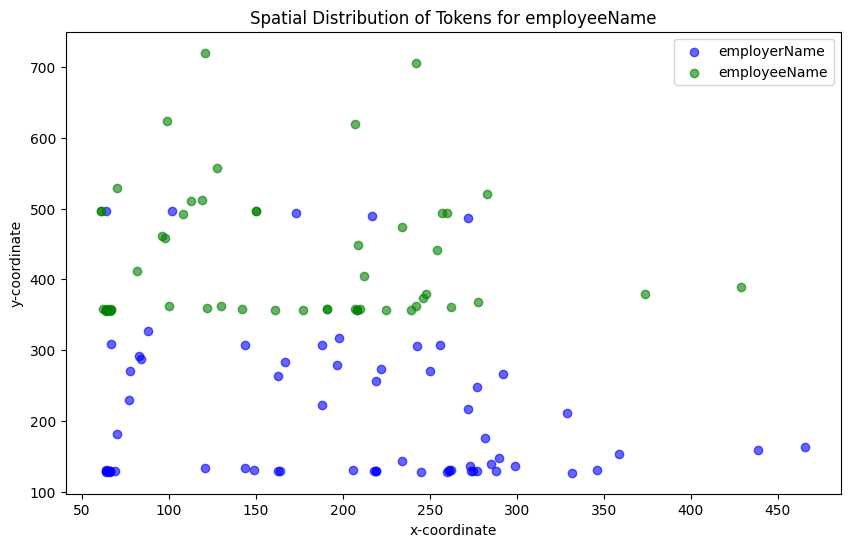

In [5]:
# Visualizing spatial distribution of tokens for certain entities
import numpy as np

def plot_token_positions(df, entity, color):
    entity_df = df[df['field'] == entity]

    plt.scatter(entity_df['x_top_left'], entity_df['y_top_left'], c=color, label=entity, alpha=0.6)
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.gca().invert_yaxis()  # Invert y-axis to match document coordinate system
    plt.title(f"Spatial Distribution of Tokens for {entity}")

# Plotting the spatial distribution for employerName and employeeName as an example
plt.figure(figsize=(10, 6))
plot_token_positions(train_df, 'employerName', 'blue')
plot_token_positions(train_df, 'employeeName', 'green')
plt.legend()
plt.show()


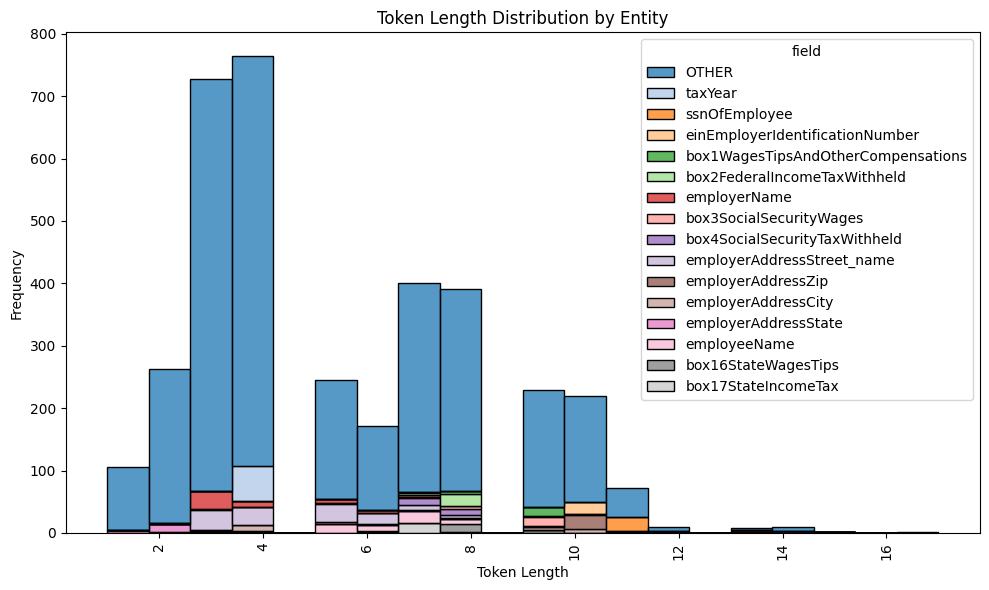

In [6]:
# Add a column for token length (number of characters in the transcript)
train_df['token_length'] = train_df['transcript'].apply(len)

# Plot the token length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='token_length', hue='field', multiple="stack", palette='tab20', bins=20)
plt.title('Token Length Distribution by Entity')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [7]:
# Check for tokens near the edges of the document (e.g., very low or high y-values)
edge_tokens = train_df[(train_df['y_top_left'] < 50) | (train_df['y_bottom_right'] > 1000)]

# Show a sample of tokens near the document edges
print(edge_tokens[['transcript', 'field', 'y_top_left', 'y_bottom_right']].head(10))


   transcript  field  y_top_left  y_bottom_right
35        W-2  OTHER        2244            2277
36       2018  OTHER        2276            2314
37       2018  OTHER        2332            2372
38        W-2  OTHER        2357            2391
39       2018  OTHER        2389            2429
40       2018  OTHER          27              73
41        W-2  OTHER          27              74
42        and  OTHER          27              75
43   EARNINGS  OTHER          27              75
44    SUMMARY  OTHER          26              74


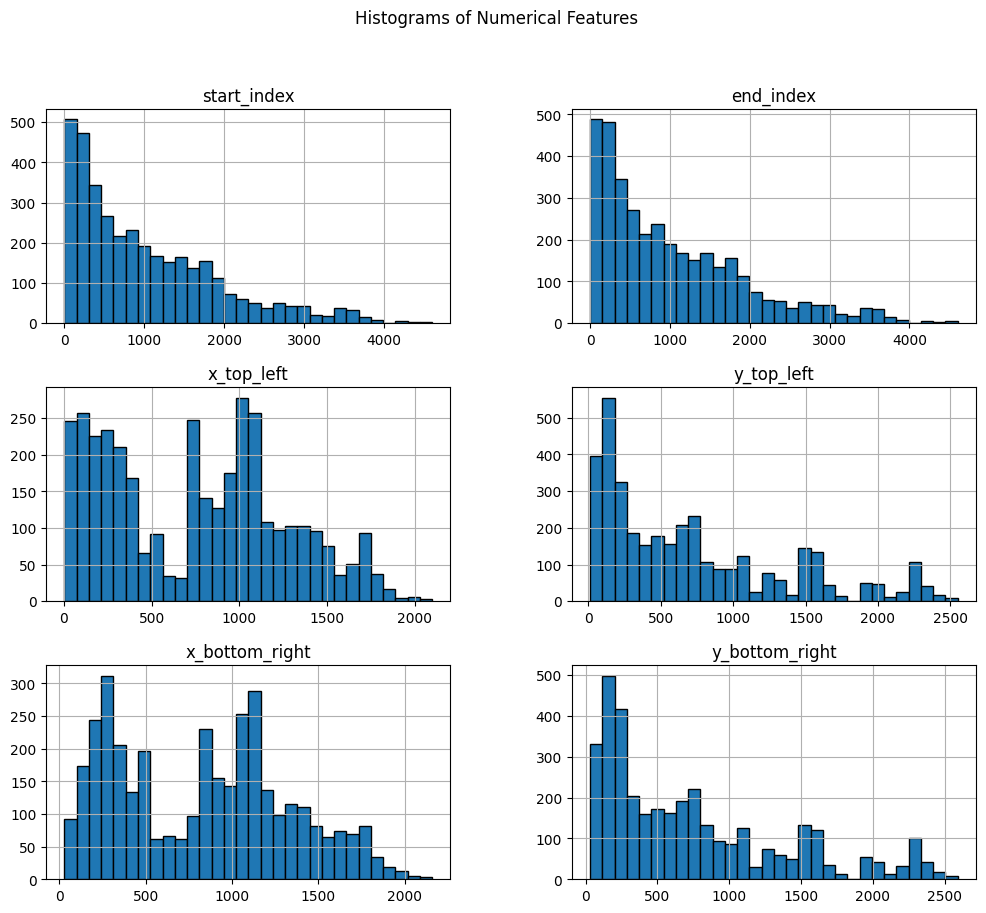

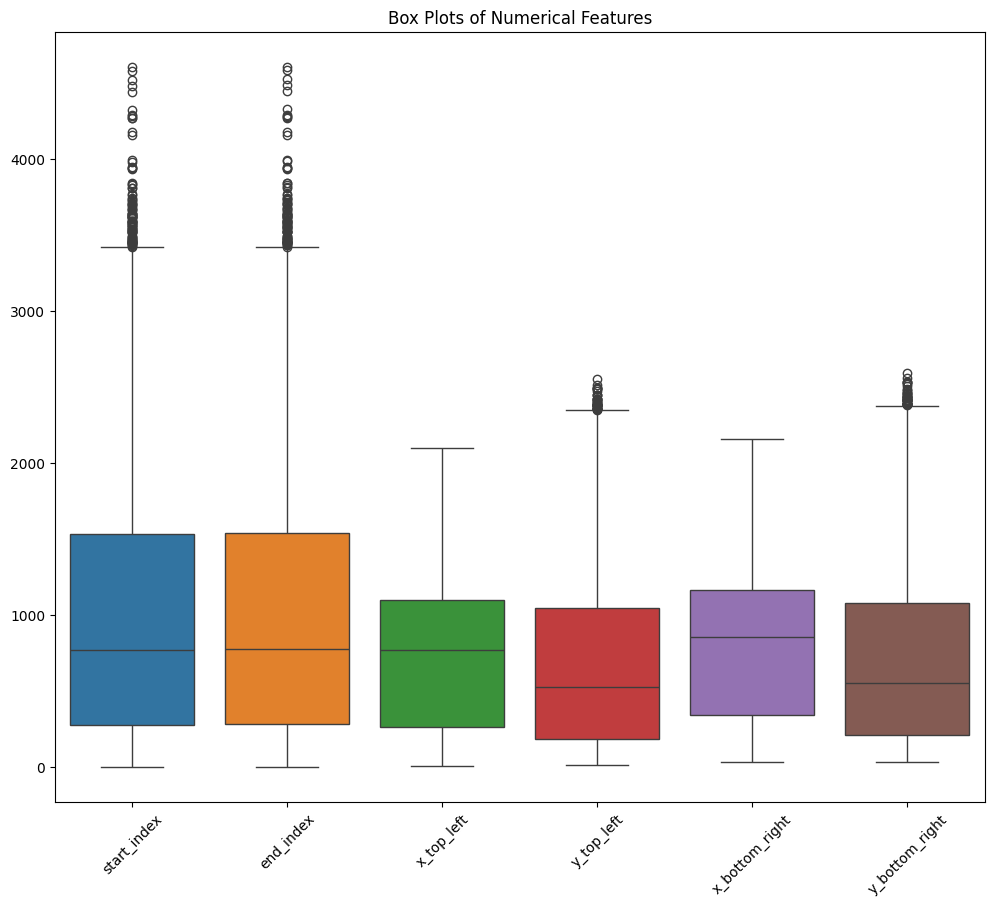

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
data.hist(figsize=(12, 10), bins=30, edgecolor='k')
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Box plots for numerical features
plt.figure(figsize=(12, 10))
sns.boxplot(data=data[['start_index', 'end_index', 'x_top_left', 'y_top_left', 'x_bottom_right', 'y_bottom_right']])
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()


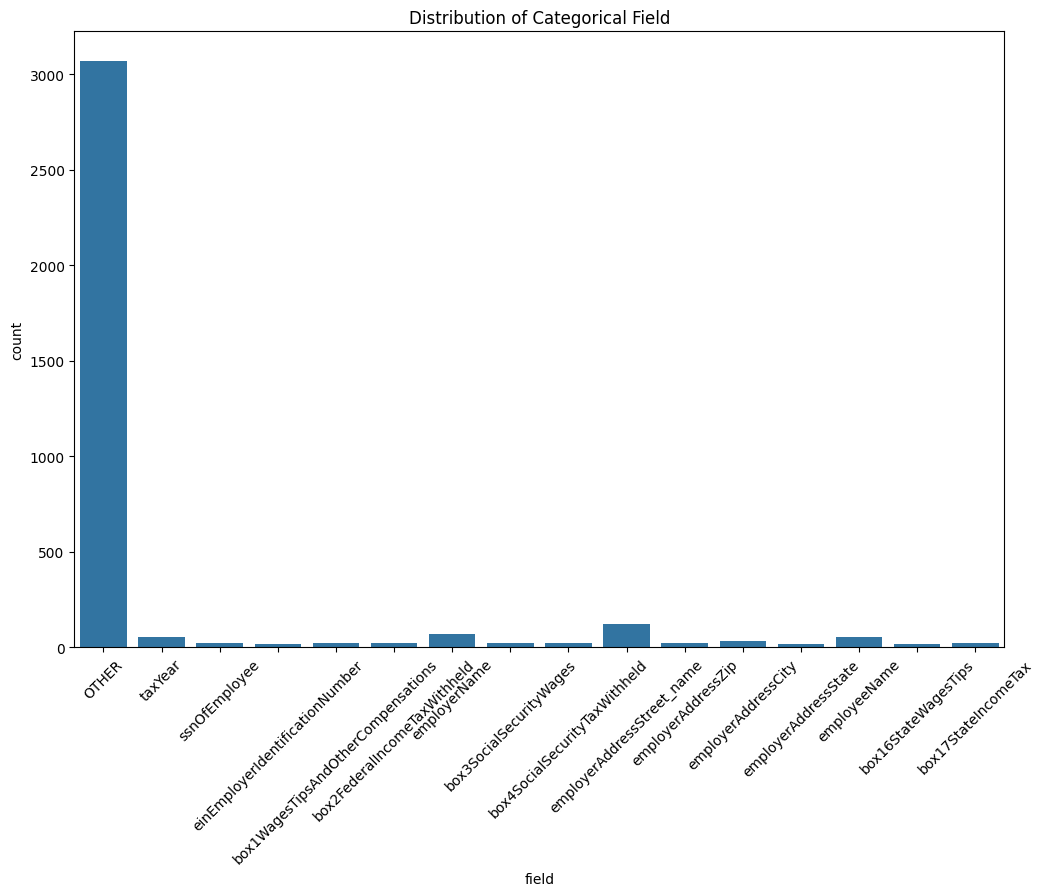

field
OTHER                                 3070
employerAddressStreet_name             124
employerName                            68
taxYear                                 56
employeeName                            55
employerAddressCity                     34
employerAddressZip                      24
box4SocialSecurityTaxWithheld           23
ssnOfEmployee                           22
box17StateIncomeTax                     22
box1WagesTipsAndOtherCompensations      21
box2FederalIncomeTaxWithheld            21
box3SocialSecurityWages                 21
box16StateWagesTips                     20
einEmployerIdentificationNumber         19
employerAddressState                    19
Name: count, dtype: int64


In [ ]:
# Countplot for categorical features
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='field')
plt.title('Distribution of Categorical Field')
plt.xticks(rotation=45)
plt.show()

# Show unique values and counts for categorical fields
print(data['field'].value_counts())


Number of records per image:
image_name
8ffac54a-c836-41d0-baba-c0d8cb84711a_document-5_page-1        180
313f76e5-31db-47ad-87cd-4fb3126702af_document-6_page-1        174
313f76e5-31db-47ad-87cd-4fb3126702af_document-6_page-1 (1)    174
9adc02e5-bf38-48cd-ad47-df43236e97c6_document-3_page-1        166
54b45f44-2869-41dc-babc-2c27b977353f_document-10_page-1       144
38cac7ad-8b09-4d47-a7b0-62d8f409681e_document-3_page-1        144
4031dfae-5c16-4513-af30-4795079ca20e_document-9_page-1        142
4031dfae-5c16-4513-af30-4795079ca20e_document-10_page-1       134
2259f961-339a-493f-9025-7c454cc8b8d7_document-5_page-1        119
2ed80ca9-5d54-4f12-9db5-ac203f7def83_document-2_page-1        116
38cac7ad-8b09-4d47-a7b0-62d8f409681e_document-4_page-1        114
ef630989-4d33-4d26-bf80-9ffece13fc5d_document-7_page-1        110
7dd13ad2-a479-434a-b92b-aae74336f438_document-3_page-1        109
1606c134-52e6-47cc-bd76-64b0ecaa4157_document-3_page-1        108
f81ed02e-f320-4082-aee7-f6c52ec68fa5

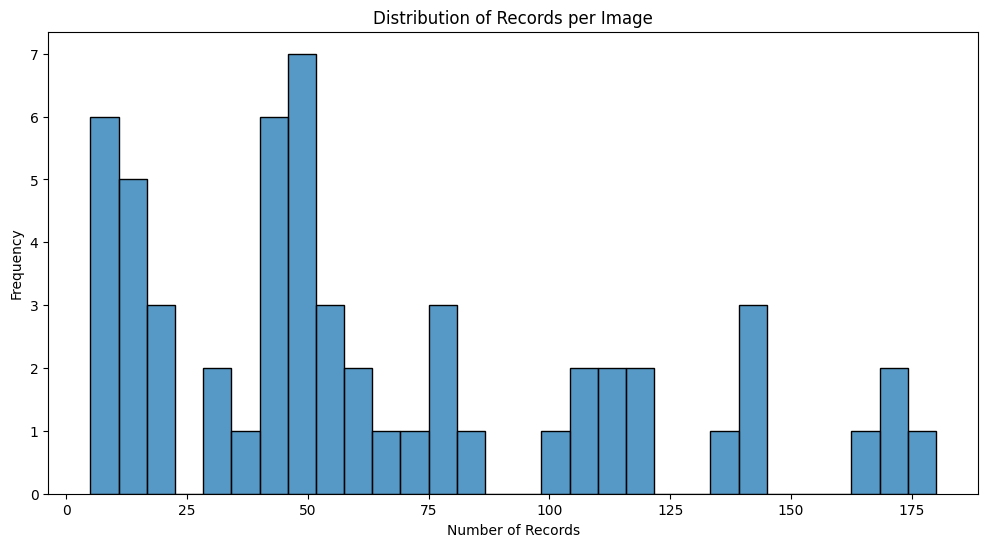

In [ ]:
# Count records per image
image_counts = data['image_name'].value_counts()
print(f"Number of records per image:\n{image_counts}")

# Plot the distribution of records per image
plt.figure(figsize=(12, 6))
sns.histplot(image_counts, bins=30, kde=False)
plt.title('Distribution of Records per Image')
plt.xlabel('Number of Records')
plt.ylabel('Frequency')
plt.show()


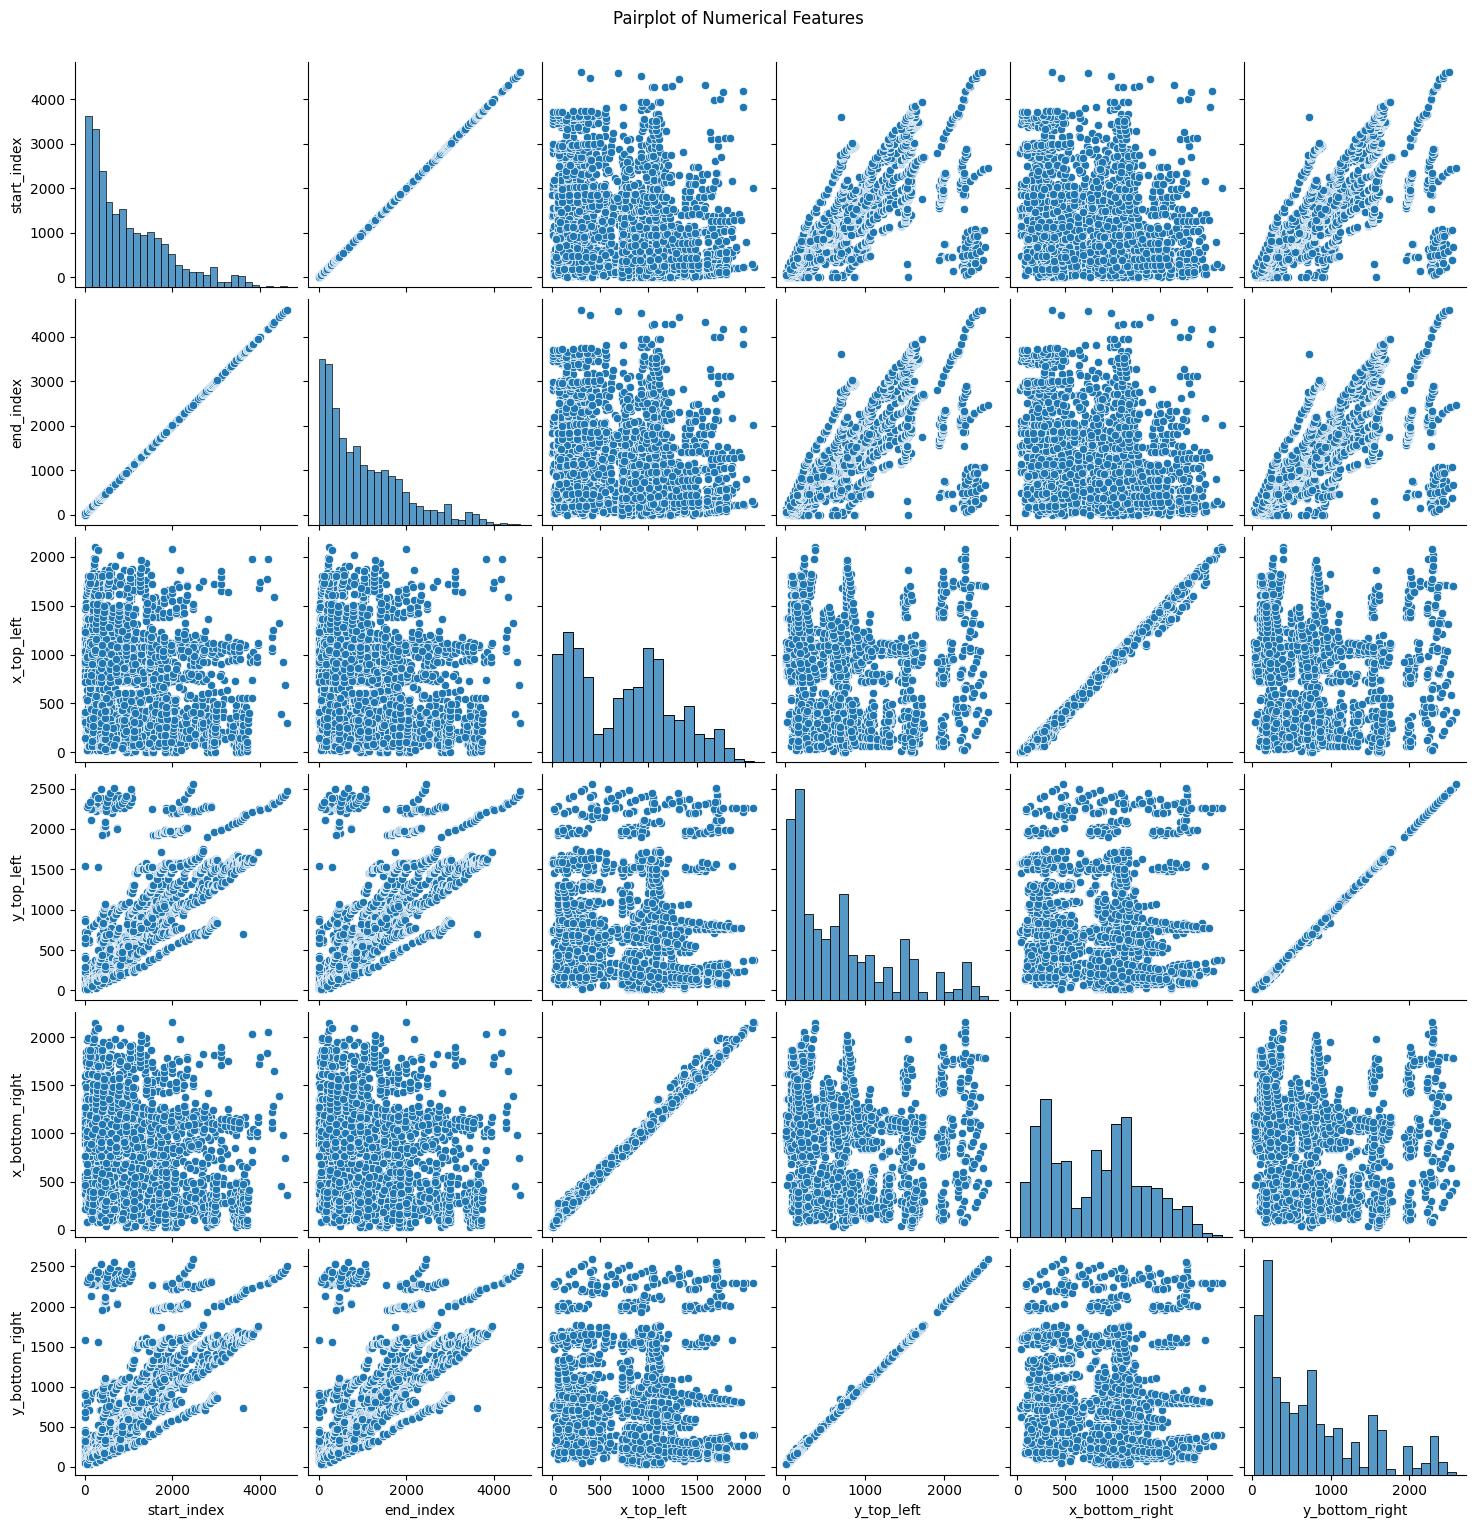

In [ ]:
# Pairplot for numerical features
sns.pairplot(data[['start_index', 'end_index', 'x_top_left', 'y_top_left', 'x_bottom_right', 'y_bottom_right']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


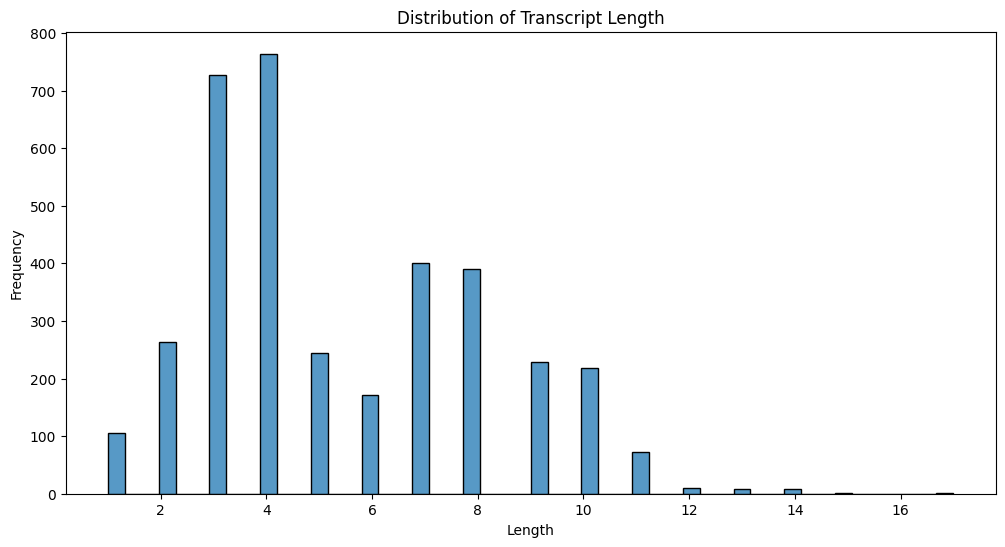

Most common words:
[('2', 163), ('w', 161), ('2018', 154), ('and', 85), ('your', 50), ('summary', 47), ('earnings', 44), ('tax', 44), ('to', 43), ('the', 38)]


In [ ]:
# Word count analysis for the 'transcript' field
data['transcript_length'] = data['transcript'].apply(lambda x: len(str(x)))
plt.figure(figsize=(12, 6))
sns.histplot(data['transcript_length'], bins=50, kde=False)
plt.title('Distribution of Transcript Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Most common words in transcripts
from collections import Counter
import re

def get_most_common_words(text_series, num_words=10):
    words = ' '.join(text_series.dropna()).lower()
    words = re.findall(r'\b\w+\b', words)
    common_words = Counter(words).most_common(num_words)
    return common_words

common_words = get_most_common_words(data['transcript'])
print(f"Most common words:\n{common_words}")


In [ ]:
from nltk.tokenize import word_tokenize
import re

# Token Cleaning and Normalization
def clean_transcript(transcript):
    transcript = transcript.lower()
    transcript = re.sub(r'[^a-zA-Z0-9\s]', '', transcript)  # Removing special characters
    return transcript

data['clean_transcript'] = data['transcript'].apply(clean_transcript)

# Grouping Tokens by Coordinates (Bounding Box Clustering)
from sklearn.cluster import DBSCAN

# Feature extraction for clustering
X = data[['x_top_left', 'y_top_left']].values
clustering = DBSCAN(eps=20, min_samples=2).fit(X)
data['group'] = clustering.labels_

# Combining tokens in the same group (clustering tokens by proximity)
def combine_tokens(group):
    tokens = group['clean_transcript'].tolist()
    return ' '.join(tokens)

grouped_data = data.groupby('group').apply(combine_tokens).reset_index(name='grouped_tokens')
print(grouped_data.head())


   group                                     grouped_tokens
0     -1  lee see 2018 w2 e 2018 w 2018 folow w2 2018 w2...
1      0  2018 earnings summary side invilubes and ary y...
2      1  w2 and sons course suite 246250241 wi 45110101...
3      2                                   and and in in in
4      3  earnings section is included guterall informat...


## Model Building

In [ ]:
!pip install --upgrade pyarrow datasets


In [ ]:
!pip install datasets

In [ ]:
!pip install pyarrow==11.0.0
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 22.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 11.0.0 which is incompatible.
datasets 2.21.0 requires pyarrow>=15.0.0, but you have pyarrow 11.0.0 which is incompatible.


  Using cached pyarrow-17.0.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.3 kB)
Using cached pyarrow-17.0.0-cp310-cp310-manylinux_2_28_x86_64.whl (39.9 MB)
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py",

In [ ]:
from transformers import LayoutLMTokenizer
from datasets import Dataset
import pandas as pd

file_path = '/content/drive/MyDrive/dataset/dataset/train/combined_data.tsv'
data = pd.read_csv(file_path, sep='\t')

def preprocess_for_layoutlm(df):
    df = df[['transcript', 'field']]
    df.columns = ['text', 'label']

    dataset = Dataset.from_pandas(df)
    return dataset

dataset = preprocess_for_layoutlm(data)

tokenizer = LayoutLMTokenizer.from_pretrained('microsoft/layoutlm-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length')

tokenized_datasets = dataset.map(tokenize_function, batched=True)

print(tokenized_datasets)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/3619 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 3619
})


In [ ]:
import re

def clean_transcript(transcript):
    transcript = re.sub(r'[^\w\s]', '', transcript)
    transcript = transcript.strip()
    return transcript

data['transcript'] = data['transcript'].apply(clean_transcript)

def normalize_bounding_boxes(df):
    df['x_top_left_norm'] = df['x_top_left'] / df['x_top_left'].max()
    df['y_top_left_norm'] = df['y_top_left'] / df['y_top_left'].max()
    df['x_bottom_right_norm'] = df['x_bottom_right'] / df['x_bottom_right'].max()
    df['y_bottom_right_norm'] = df['y_bottom_right'] / df['y_bottom_right'].max()
    return df

data = normalize_bounding_boxes(data)

grouped_fields = data.groupby('field')['transcript'].apply(lambda x: ' '.join(x)).reset_index()
print(grouped_fields.head())


                                field  \
0                               OTHER   
1                 box16StateWagesTips   
2                 box17StateIncomeTax   
3  box1WagesTipsAndOtherCompensations   
4        box2FederalIncomeTaxWithheld   

                                          transcript  
0  2018 W2 and EARNINGS SUMMARY W2 This Bile Earn...  
1  6993453 9763103 10874435 10930307 9496051 4010...  
2  505494 501572 597256 796035 30106 227424 45262...  
3  12875419 18055805 21024994 22687204 18310634 8...  
4  4001589 6905009 4202925 9776136 305597 203704 ...  


In [ ]:
pip install transformers datasets


  Using cached pyarrow-17.0.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.3 kB)
Using cached pyarrow-17.0.0-cp310-cp310-manylinux_2_28_x86_64.whl (39.9 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 11.0.0
    Uninstalling pyarrow-11.0.0:
      Successfully uninstalled pyarrow-11.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


## Noemalizing Bounding Box COORDINATES

In [ ]:
# Normalize bounding box coordinates to fit within the 0-1000 range
def normalize_bbox(bbox, image_width=1000, image_height=1000):
    return [
        [
            int(1000 * min(x1 / image_width, 1)),  # Normalize x1 (top-left x)
            int(1000 * min(y1 / image_height, 1)), # Normalize y1 (top-left y)
            int(1000 * min(x2 / image_width, 1)),  # Normalize x2 (bottom-right x)
            int(1000 * min(y2 / image_height, 1))  # Normalize y2 (bottom-right y)
        ]
        for x1, y1, x2, y2 in bbox
    ]

def encode_data(examples):
    encoding = tokenizer(
        examples['transcript'],
        truncation=True,
        padding='max_length',
        max_length=512
    )

    encoding['labels'] = [field_to_id[field] for field in examples['field']]

    encoding['bbox'] = normalize_bbox(
        [
            (
                int(examples['x_top_left'][i]),
                int(examples['y_top_left'][i]),
                int(examples['x_bottom_right'][i]),
                int(examples['y_bottom_right'][i])
            ) for i in range(len(examples['x_top_left']))
        ]
    )

    return encoding

train_dataset = train_dataset.map(encode_data, batched=True)


Map:   0%|          | 0/3619 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd

def load_tsv_data(file_path):
    return pd.read_csv(file_path, sep='\t')

train_file = '/content/drive/MyDrive/dataset/dataset/train/combined_data.tsv'
val_file = '/content/drive/MyDrive/dataset/dataset/val/combined_data.tsv'

train_data = load_tsv_data(train_file)
# val_data = load_tsv_data(val_file)

print(train_data.head())


   start_index  end_index  x_top_left  y_top_left  x_bottom_right  \
0           33         36         980          95            1091   
1           38         40         210         137             268   
2           42         44        1200         112            1290   
3           46         53        1296         120            1552   
4           55         61        1563         142            1815   

   y_bottom_right transcript  field  \
0             151       2018  OTHER   
1             170        W-2  OTHER   
2             169        and  OTHER   
3             192   EARNINGS  OTHER   
4             213    SUMMARY  OTHER   

                                          image_name  
0  d1525a1d-d1c3-42ec-b340-12b6a9c6fb56_document-...  
1  d1525a1d-d1c3-42ec-b340-12b6a9c6fb56_document-...  
2  d1525a1d-d1c3-42ec-b340-12b6a9c6fb56_document-...  
3  d1525a1d-d1c3-42ec-b340-12b6a9c6fb56_document-...  
4  d1525a1d-d1c3-42ec-b340-12b6a9c6fb56_document-...  


## BERT model for token classification

In [ ]:
# !pip install transformers datasets

import torch
from transformers import BertTokenizerFast, BertForTokenClassification, Trainer, TrainingArguments
from datasets import Dataset

# Prepare the data for training
def preprocess_data(df):
    # Tokenize the transcript column
    tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

    # Encode the transcripts
    encodings = tokenizer(df['transcript'].tolist(), truncation=True, padding=True, return_tensors="pt")

    # Map the entity labels to numerical ids
    label_mapping = {entity: i for i, entity in enumerate(df['field'].unique())}
    labels = [label_mapping[label] for label in df['field']]

    encodings['labels'] = torch.tensor(labels)

    return encodings, label_mapping

train_encodings, label_mapping = preprocess_data(train_data)

# Define the model
model = BertForTokenClassification.from_pretrained('bert-base-uncased', num_labels=len(label_mapping))

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',        # output directory
    num_train_epochs=3,            # number of training epochs
    per_device_train_batch_size=16,  # batch size for training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,              # number of warmup steps for learning rate scheduler
    weight_decay=0.01,             # strength of weight decay
    logging_dir='./logs',          # directory for storing logs
)

# Create the Dataset object
train_dataset = Dataset.from_dict(train_encodings)

# Initialize the Trainer
trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
)

# Train the model
trainer.train()


torch.Size([3619, 10])


In [ ]:
from transformers import Trainer, TrainingArguments

model = BertForTokenClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(label_mapping)
)

training_args = TrainingArguments(
    output_dir='./results',        # output directory
    num_train_epochs=3,            # number of training epochs
    per_device_train_batch_size=16,  # Adjust batch size
    per_device_eval_batch_size=64,   # Evaluation batch size
    warmup_steps=500,              # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,             # Strength of weight decay
    logging_dir='./logs',          # Directory for storing logs
)

train_dataset = Dataset.from_dict(train_encodings)

trainer = Trainer(
    model=model,                         # The instantiated Transformers model to be trained
    args=training_args,                  # Training arguments
    train_dataset=train_dataset,         # Training dataset
)

trainer.train()


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
500,0.918700


TrainOutput(global_step=681, training_loss=0.8384391683838966, metrics={'train_runtime': 2193.1041, 'train_samples_per_second': 4.951, 'train_steps_per_second': 0.311, 'total_flos': 55415194591680.0, 'train_loss': 0.8384391683838966, 'epoch': 3.0})